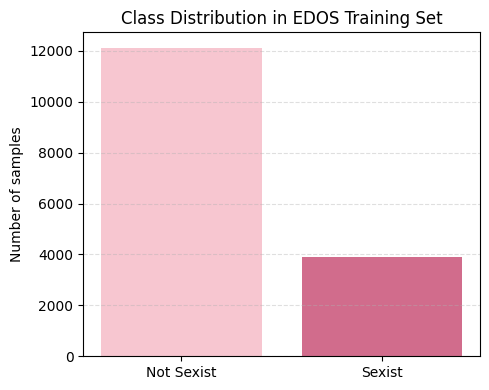

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/task1_train.csv")

counts = df["task1_label"].value_counts().sort_index()
labels = ["Not Sexist", "Sexist"]

plt.figure(figsize=(5,4))
plt.bar(
    labels,
    counts.values,
    color=["#F7C6D0", "#D16C8C"]  # soft pink & dusty rose
)

plt.ylabel("Number of samples")
plt.title("Class Distribution in EDOS Training Set")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("figures/class_distribution.png", dpi=300)
plt.show()



Loading weights: 100%|██████████| 103/103 [00:00<00:00, 185.78it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Batches: 100%|██████████| 16/16 [00:12<00:00,  1.26it/s]


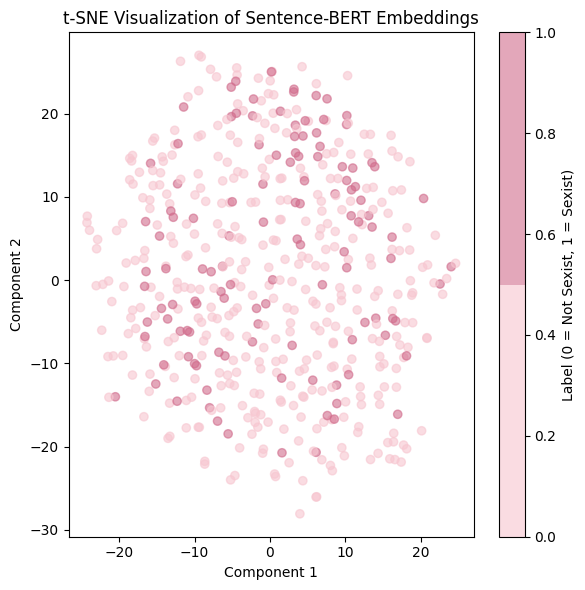

In [4]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

# Load small subset (for speed)
df = pd.read_csv("../data/processed/task1_test.csv").sample(500, random_state=42)

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df["text"].tolist(), show_progress_bar=True)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
proj = tsne.fit_transform(embeddings)

plt.figure(figsize=(6,6))
scatter = plt.scatter(
    proj[:, 0],
    proj[:, 1],
    c=df["task1_label"],
    cmap=plt.cm.colors.ListedColormap(["#F7C6D0", "#D16C8C"]),
    alpha=0.6
)

plt.title("t-SNE Visualization of Sentence-BERT Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Label (0 = Not Sexist, 1 = Sexist)")

plt.tight_layout()
plt.savefig("figures/tsne_embeddings.png", dpi=300)
plt.show()



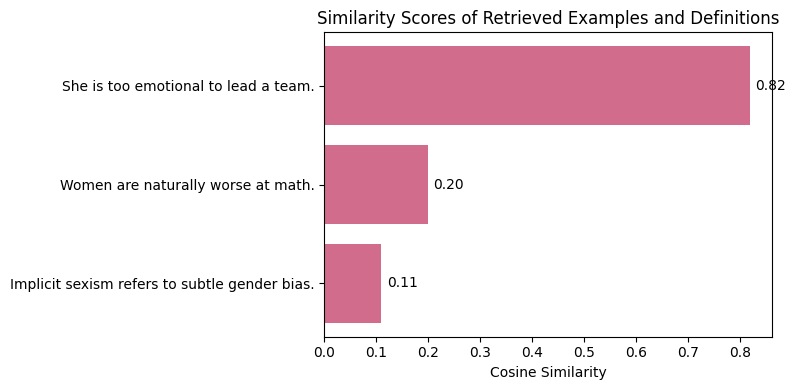

In [5]:
import matplotlib.pyplot as plt

# Example retrieved items (from retrieval output)
retrieved_texts = [
    "She is too emotional to lead a team.",
    "Women are naturally worse at math.",
    "Implicit sexism refers to subtle gender bias."
]

similarity_scores = [0.82, 0.20, 0.11]

# Create bar plot
plt.figure(figsize=(8, 4))
bars = plt.barh(
    range(len(similarity_scores)),
    similarity_scores,
    color="#D16C8C"  # dusty pink
)

# Labels
plt.yticks(range(len(similarity_scores)), retrieved_texts)
plt.xlabel("Cosine Similarity")
plt.title("Similarity Scores of Retrieved Examples and Definitions")

# Invert y-axis (highest similarity on top)
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center"
    )

# Save figure
plt.tight_layout()
plt.savefig("figures/retrieval_similarity_scores.png", dpi=300)
plt.show()

